# Análise univariada

A análise univariada corresponde a um processo de análise de dados que consiste em analisar um único atributo de um conjunto de dados por vez. Dessa forma, cada atributo é analisado individualmente de acordo com suas próprias características.

## Preparando o ambiente

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregando os dados

In [3]:
dataset = pd.read_csv('../data/complete_dataset/complete_dataset.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,south asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,south asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,south asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,south asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,south asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


Lista dos atributos que serão analisados:

* country	
* region	
* score	
* gdp	
* social_support	
* hle	
* freedom	
* generosity	
* corruption	
* positive_affect	
* negative_affect	
* year

### `country`

#### 1. Quantos países estão presentes nos dados?

In [6]:
len(dataset['country'].unique())

166

#### 2. Quais países realizaram mais pesquisas?

In [18]:
country_count = pd.DataFrame(dataset['country'].value_counts()).reset_index().rename(columns={'index':'country', 'country':'count'})

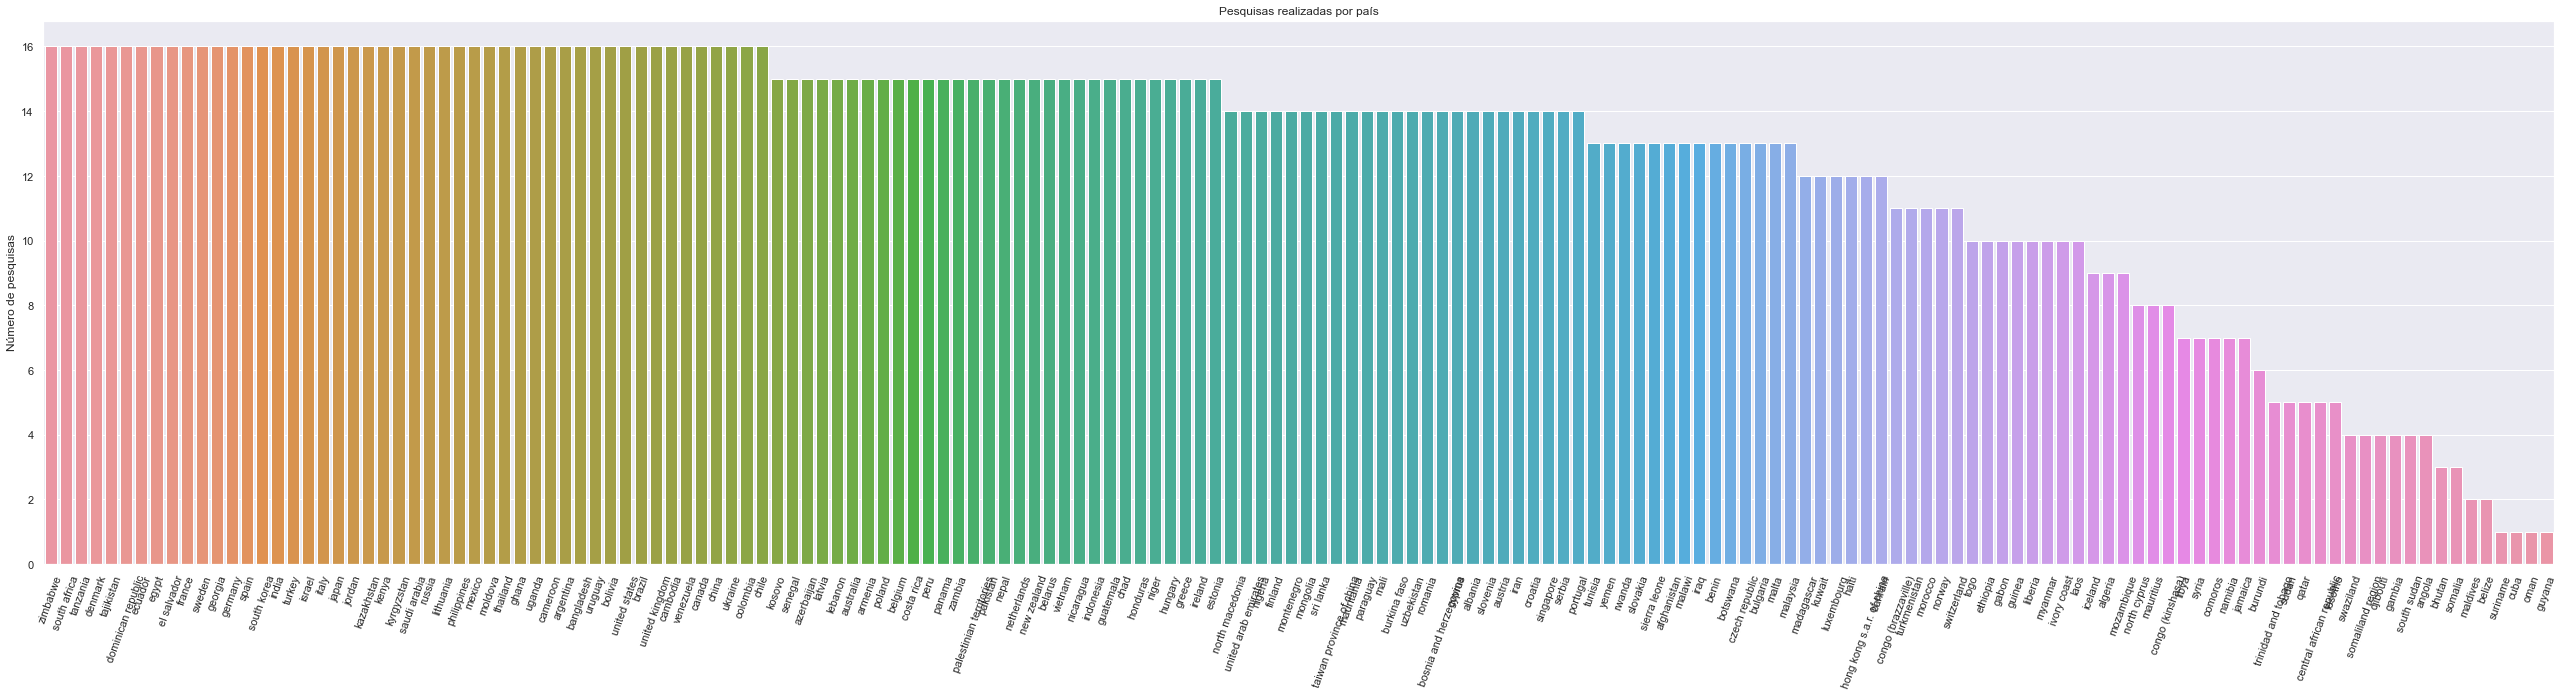

In [31]:
sns.set(rc={'figure.figsize':(45,10)})
sns.barplot(data=country_count, x= 'country', y='count')
plt.xticks(rotation=70)
plt.title('Pesquisas realizadas por país')
plt.xlabel('')
plt.ylabel('Número de pesquisas')
plt.show();

Como são muitos países fica difícil de entender o gráfico dessa forma. Para melhorar a visualização de presença de países na pesquisa vamos fazer uma visualização por presença:

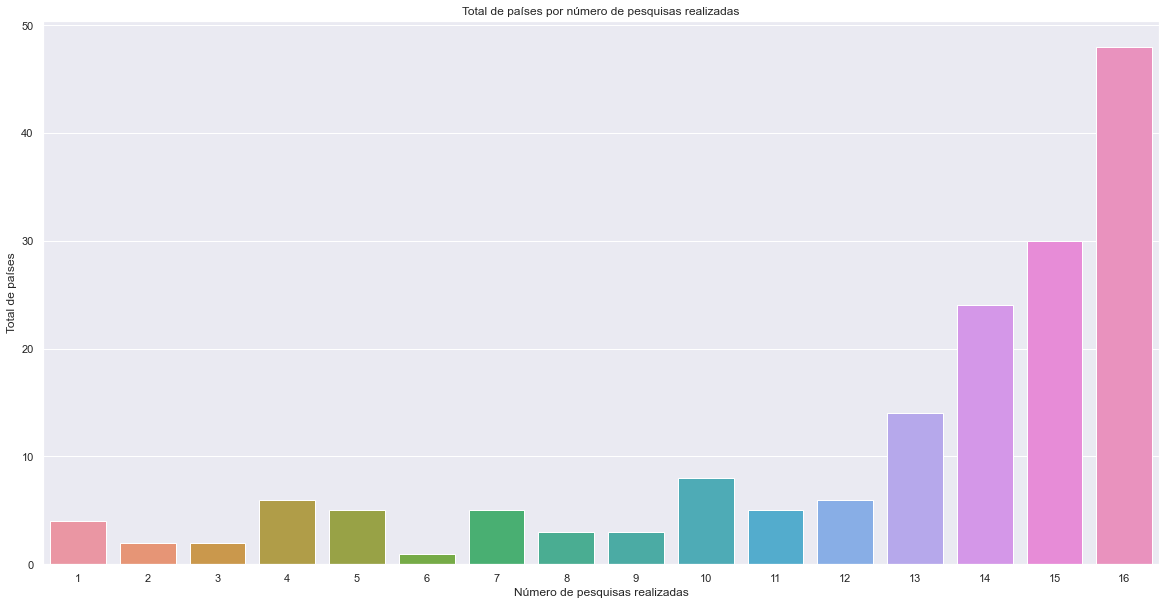

In [48]:
sns.set(rc={'figure.figsize':(20,10)})
responses_country_count = pd.DataFrame(country_count['count'].value_counts()).reset_index().rename(columns={'index':'count', 'count':'n_countries'}).sort_values(by='count', ascending=False)
sns.barplot(data=responses_country_count, x= 'count', y='n_countries')
plt.title('Total de países por número de pesquisas realizadas')
plt.ylabel('Total de países')
plt.xlabel('Número de pesquisas realizadas')
plt.show();

É possível perceber que grande parte dos países presentes têm mais do que 13 pesquisas.

In [57]:
gt13 = np.sum(responses_country_count.query('count >= 13')['n_countries']) / np.sum(responses_country_count['n_countries']) * 100
print(f'Um total de {round(gt13, 2)}% dos países presentes no dataset possuem mais de 13 pesquisas realizadas ')

Um total de 69.88% dos países presentes no dataset possuem mais de 13 pesquisas realizadas 


Dos países com menos de 13 respostas, a distribuição é:

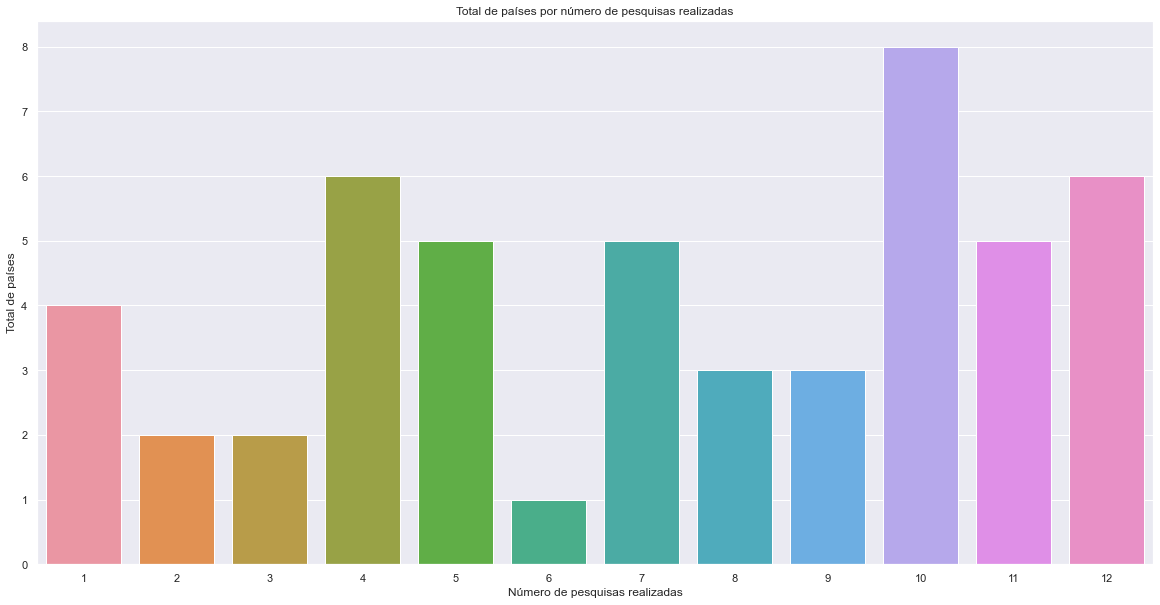

In [58]:
sns.barplot(data=responses_country_count.query('count < 13'), x= 'count', y='n_countries')
plt.title('Total de países por número de pesquisas realizadas')
plt.ylabel('Total de países')
plt.xlabel('Número de pesquisas realizadas')
plt.show();

Os três valores mais frequentes são 10, 12 e 4, mas claramente uma minoria dos países respondeu menos do que 5 vezes a pesquisa. Dessa forma é possível considerar os dados com uma distribuição razoável e equilibrada entre os países. No entanto é necessário manter a atenção na criação dos modelos de ML para, caso necessário, remover países com poucos dados para evitar distorção nos modelos.

In [60]:
lte5 = np.sum(responses_country_count.query('count <= 5')['n_countries']) / np.sum(responses_country_count['n_countries']) * 100
print(f'Um total de {round(lte5, 2)}% dos países presentes no dataset possuem 5 ou menos pesquisas realizadas ')

Um total de 11.45% dos países presentes no dataset possuem 5 ou menos pesquisas realizadas 


##### Análises multivariadas recomendadas

* Relação entre o score e o número de pesquisas realizadas pelo país
* Presença anual de países na pesquisa
* Relação entre as métricas e o número de pesquisas realizadas.